Given the same function as in Oppgave 1, i.e. f (x, y, z) = sin(π(xy+y2 −z2)).
Let A′ = (0.01, 0, 0), B′ = (0.05, 0.95, 1), C′ = (−0.65, 0.95, −1.15),
D′ = (0.85, 1.15, 0.95), and E′ = a randomly created point in R3.
a (vekt 10%)
Run the algorithms Gradient Descent, Newton’s method, NAG, Momentum,
BFGS and Backtracking Gradient Descent, with each of the given points
A′, B′, C′, D′, E′, with the aim of finding a critical point of f .
Report the experimental results containing the following information:
how much time is used, how many iterates, what is the end point, the value
of the function, the gradient and the Hessian at the end point, the eigenvalues
of the Hessian at the end point, as well as your possible conclusion: is the
end point a local minimum, a local maximum or a saddle point.

In [61]:
import timeit
import numpy as np
import numdifftools as nd
from scipy.optimize import minimize

class GradientDescent:
    def __init__(self, func, start_point, learning_rate=0.1, max_iter=10000, tol=1e-6):
        self.func = func
        self.start_point = np.array(start_point)
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.end_point = None
        self.iterates = None
        self.time_used = None
        self.function_value = None
        self.function_values = []  # Store function values after each iteration
        self.gradient_norm = None

    def gradient_descent(self):
        x_t = self.start_point
        g = nd.Gradient(self.func)
        H = nd.Hessian(self.func)

        import time
        start_time = time.time()

        for i in range(self.max_iter):
            gradient = g(x_t)
            hessian = H(x_t)
            x_tplus1 = x_t - self.learning_rate * np.linalg.inv(hessian) @ gradient

            if np.linalg.norm(gradient) < self.tol:
                break

            x_t = x_tplus1
            self.function_values.append(self.func(x_t))  # Store function value after each iteration

        end_time = time.time()
        self.time_used = end_time - start_time
        self.end_point = x_tplus1
        self.iterates = i + 1
        self.function_value = self.func(x_tplus1)
        self.gradient = g(x_tplus1)
        self.hessian = hessian
        self.eigenvalues = np.linalg.eigvals(hessian)

        return self

    def print_results(self):
        print(f"Time used: {self.time_used} seconds")
        print(f"Number of iterates: {self.iterates}")
        print(f"End point: {self.end_point}")
        print(f"Function value: {self.function_value}")
        print(f"Gradient at the end point: {self.gradient_norm}")
        print(f"Hessian at the end point:\n{self.hessian}")
        print(f"Eigenvalues of the Hessian at the end point: {self.eigenvalues}")
        if np.all(self.eigenvalues > 0):
            print("Gradient Descent found: Local minimum")
        elif np.all(self.eigenvalues < 0):
            print("Gradient Descent found: Local maximum")
        else:
            print("Gradient Descent found: Saddle point")
            
class NewtonMethod(object):

    def __init__(self, func, start_point, step_size=0.8, max_iter=10000, tol=1e-6):
        '''
        func: function to be optimized. Takes a vector argument as input and returns
              a scalar output
        step_size: step size in newton method update step
        max_iter: maximum number of iterations for newton method to run
        tol: tolerance to determine convergence based on the norm of the gradient
        '''
        self.func = func
        self.start_point = np.array(start_point)
        self.max_iter = max_iter
        self.step_size = step_size
        self.tol = tol
        self.end_point = None
        self.iterates = None
        self.time_used = None
        self.function_value = None
        self.function_values = []  # Store function values after each iteration
        self.gradient = None
        self.hessian = None
        self.eigenvalues = None
        self.conclusion = None

    def newton_method(self):
        '''
        perform multivariate newton method for function with vector input
        and scalar output
        '''
        x_t = self.start_point
        # Get an approximation to hessian of function
        H = nd.Hessian(self.func)
        # Get an approximation of Gradient of function
        g = nd.Gradient(self.func)

        import time
        start_time = time.time()

        for i in range(self.max_iter):
            x_tplus1 = x_t - self.step_size * np.dot(np.linalg.inv(H(x_t)), g(x_t))
            # Check for convergence based on the norm of the gradient
            if np.linalg.norm(g(x_tplus1)) < self.tol:
                break
            x_t = x_tplus1
            self.function_values.append(self.func(x_t))  # Store function value after each iteration

        end_time = time.time()
        self.time_used = end_time - start_time
        self.end_point = x_tplus1
        self.iterates = i + 1
        self.function_value = self.func(x_tplus1)
        self.gradient = g(x_tplus1)
        self.hessian = H(x_tplus1)
        self.eigenvalues = np.linalg.eigvals(self.hessian)

        return self

    def print_results(self):
        '''
        print the experimental results including time used, number of iterates,
        end point, function value, gradient, Hessian, eigenvalues, and conclusion.
        '''
        print(f"Time used: {self.time_used} seconds")
        print(f"Number of iterates: {self.iterates}")
        print(f"End point: {self.end_point}")
        print(f"Function value: {self.function_value}")
        print(f"Gradient at the end point: {self.gradient}")
        print(f"Hessian at the end point:\n{self.hessian}")
        print(f"Eigenvalues of the Hessian at the end point: {self.eigenvalues}")
        if np.all(self.eigenvalues > 0):
            print("Newton's Method found: Local minimum")
        elif np.all(self.eigenvalues < 0):
            print("Newton's Method found: Local maximum")
        else:
            print("Newton's Method found: Saddle point")

class NesterovAcceleratedGradient:
    def __init__(self, func, start_point, learning_rate=0.1, momentum=0.9, max_iter=10000, tol=1e-6):
        self.func = func
        self.start_point = np.array(start_point)
        self.learning_rate = learning_rate
        self.momentum = momentum
        self.max_iter = max_iter
        self.tol = tol
        self.end_point = None
        self.iterates = None
        self.time_used = None
        self.function_value = None
        self.function_values = []  # Store function values after each iteration
        self.gradient = None
        self.hessian = None
        self.eigenvalues = None

    def nag(self):
        x_t = self.start_point
        g = nd.Gradient(self.func)
        H = nd.Hessian(self.func)
        momentum = np.zeros_like(x_t)

        import time
        start_time = time.time()

        for i in range(self.max_iter):
            gradient = g(x_t - self.momentum * momentum)
            hessian = H(x_t - self.momentum * momentum)
            momentum = self.momentum * momentum + self.learning_rate * np.linalg.inv(hessian) @ gradient
            x_tplus1 = x_t - momentum

            if np.linalg.norm(gradient) < self.tol:
                break

            x_t = x_tplus1
            self.function_values.append(self.func(x_t))  # Store function value after each iteration

        end_time = time.time()
        self.time_used = end_time - start_time
        self.end_point = x_tplus1
        self.iterates = i + 1
        self.function_value = self.func(x_tplus1)
        self.gradient = g(x_tplus1)
        self.hessian = hessian
        self.eigenvalues = np.linalg.eigvals(hessian)

        return self

    def print_results(self):
        print(f"Time used: {self.time_used} seconds")
        print(f"Number of iterates: {self.iterates}")
        print(f"End point: {self.end_point}")
        print(f"Function value: {self.function_value}")
        print(f"Gradient at the end point: {self.gradient}")
        print(f"Hessian at the end point:\n{self.hessian}")
        print(f"Eigenvalues of the Hessian at the end point: {self.eigenvalues}")
        if np.all(self.eigenvalues > 0):
            print("NAG found: Local minimum")
        elif np.all(self.eigenvalues < 0):
            print("NAG found: Local maximum")
        else:
            print("NAG found: Saddle point")

class Momentum:
    def __init__(self, func, start_point, learning_rate=0.1, momentum_factor=0.9, max_iter=10000, tol=1e-6):
        self.func = func
        self.start_point = np.array(start_point)
        self.learning_rate = learning_rate
        self.momentum_factor = momentum_factor
        self.max_iter = max_iter
        self.tol = tol
        self.end_point = None
        self.iterates = None
        self.time_used = None
        self.function_value = None
        self.function_values = []  # Store function values after each iteration
        self.gradient = None
        self.hessian = None
        self.eigenvalues = None

    def momentum(self):
        x_t = self.start_point
        g = nd.Gradient(self.func)
        H = nd.Hessian(self.func)
        momentum = np.zeros_like(x_t)

        import time
        start_time = time.time()

        for i in range(self.max_iter):
            gradient = g(x_t)
            hessian = H(x_t)
            momentum = self.momentum_factor * momentum + self.learning_rate * np.linalg.inv(hessian) @ gradient
            x_tplus1 = x_t - momentum

            if np.linalg.norm(gradient) < self.tol:
                break

            x_t = x_tplus1
            self.function_values.append(self.func(x_t))  # Store function value after each iteration

        end_time = time.time()
        self.time_used = end_time - start_time
        self.end_point = x_tplus1
        self.iterates = i + 1
        self.function_value = self.func(x_tplus1)
        self.gradient = g(x_tplus1)
        self.hessian = hessian
        self.eigenvalues = np.linalg.eigvals(hessian)

        return self

    def print_results(self):
        print(f"Time used: {self.time_used} seconds")
        print(f"Number of iterates: {self.iterates}")
        print(f"End point: {self.end_point}")
        print(f"Function value: {self.function_value}")
        print(f"Gradient at the end point: {self.gradient}")
        print(f"Hessian at the end point:\n{self.hessian}")
        print(f"Eigenvalues of the Hessian at the end point: {self.eigenvalues}")
        if np.all(self.eigenvalues > 0):
            print("Momentum found: Local minimum")
        elif np.all(self.eigenvalues < 0):
            print("Momentum found: Local maximum")
        else:
            print("Momentum found: Saddle point")

class BFGS:
    def __init__(self, func, start_point, max_iter=10000, tol=1e-6):
        self.func = func
        self.start_point = np.array(start_point)
        self.max_iter = max_iter
        self.tol = tol
        self.end_point = None
        self.iterates = None
        self.time_used = None
        self.function_value = None
        self.function_values = []  # Store function values after each iteration
        self.gradient = None
        self.hessian = None
        self.eigenvalues = None

    def bfgs(self):
        x_t = self.start_point
        g = nd.Gradient(self.func)
        H = nd.Hessian(self.func)

        # Initialize the Hessian inverse
        hessian_inv = np.linalg.inv(H(x_t))

        import time
        start_time = time.time()

        for i in range(self.max_iter):
            gradient = g(x_t)
            x_tplus1 = x_t - hessian_inv @ gradient

            if np.linalg.norm(gradient) < self.tol:
                break

            delta_x = x_tplus1 - x_t
            delta_g = g(x_tplus1) - gradient

            # Add a small value to the denominator to avoid division by zero
            rho = 1.0 / (np.dot(delta_g, delta_x) + 1e-8)

            term1 = np.eye(len(delta_x)) - rho * np.outer(delta_x, delta_g)
            term2 = np.eye(len(delta_x)) - rho * np.outer(delta_g, delta_x)

            hessian_inv = term1 @ hessian_inv @ term2 + rho * np.outer(delta_x, delta_x)

            x_t = x_tplus1
            self.function_values.append(self.func(x_t))  # Store function value after each iteration

        end_time = time.time()
        self.time_used = end_time - start_time
        self.end_point = x_tplus1
        self.iterates = i + 1
        self.function_value = self.func(x_tplus1)
        self.gradient = g(x_tplus1)
        self.hessian = H(x_tplus1)
        self.eigenvalues = np.linalg.eigvals(self.hessian)

        return self

    def print_results(self):
        print(f"Time used: {self.time_used} seconds")
        print(f"Number of iterates: {self.iterates}")
        print(f"End point: {self.end_point}")
        print(f"Function value: {self.function_value}")
        print(f"Gradient at the end point: {self.gradient}")
        print(f"Hessian at the end point:\n{self.hessian}")
        print(f"Eigenvalues of the Hessian at the end point: {self.eigenvalues}")
        if np.all(self.eigenvalues > 0):
            print("BFGS found: Local minimum")
        elif np.all(self.eigenvalues < 0):
            print("BFGS found: Local maximum")
        else:
            print("BFGS found: Saddle point")

class BacktrackingGradientDescent:
    def __init__(self, func, start_point, max_iter=10000, tol=1e-6):
        self.func = func
        self.start_point = np.array(start_point)
        self.max_iter = max_iter
        self.tol = tol
        self.max_time = 60  # Maximum time limit in seconds
        self.end_point = None
        self.iterates = None
        self.time_used = None
        self.function_value = None
        self.function_values = []  # Store function values after each iteration
        self.gradient = None
        self.hessian = None
        self.eigenvalues = None

    def backtracking_gradient_descent(self):
        x_t = self.start_point
        g = nd.Gradient(self.func)
        H = nd.Hessian(self.func)

        import time
        start_time = time.time()

        for i in range(self.max_iter):
            gradient = g(x_t)
            hessian = H(x_t)
            t = 0.01
            alpha = 0.2
            beta = 0.5

            while self.func(x_t - t * np.linalg.inv(hessian) @ gradient) > self.func(x_t) - alpha * t * np.linalg.norm(gradient)**2:
                t *= beta

            x_tplus1 = x_t - t * np.linalg.inv(hessian) @ gradient

            if np.linalg.norm(gradient) < self.tol:
                break

            x_t = x_tplus1
            self.function_values.append(self.func(x_t))  # Store function value after each iteration

            # Check if the maximum time limit is reached
            if time.time() - start_time > self.max_time:
                self.time_used = time.time() - start_time
                self.end_point = x_t
                self.iterates = i + 1
                self.function_value = self.func(x_t)
                self.gradient = gradient
                self.hessian = hessian
                self.eigenvalues = np.linalg.eigvals(hessian)
                print("Optimizer reached the maximum set time of 60 seconds.")
                return self

        end_time = time.time()
        self.time_used = end_time - start_time
        self.end_point = x_tplus1
        self.iterates = i + 1
        self.function_value = self.func(x_tplus1)
        self.gradient = g(x_tplus1)
        self.hessian = hessian
        self.eigenvalues = np.linalg.eigvals(hessian)

        return self

    def print_results(self):
        print(f"Time used: {self.time_used} seconds")
        print(f"Number of iterates: {self.iterates}")
        print(f"End point: {self.end_point}")
        print(f"Function value: {self.function_value}")
        print(f"Gradient at the end point: {self.gradient}")
        print(f"Hessian at the end point:\n{self.hessian}")
        print(f"Eigenvalues of the Hessian at the end point: {self.eigenvalues}")
        if np.all(self.eigenvalues > 0):
            print("Backtracking Gradient Descent found: Local minimum")
        elif np.all(self.eigenvalues < 0):
            print("Backtracking Gradient Descent found: Local maximum")
        else:
            print("Backtracking Gradient Descent found: Saddle point")



In [75]:
# Define the function f(x, y, z)
def f(x):
    x_val, y_val, z_val = x
    return np.sin(np.pi * (x_val * y_val + y_val**2 - z_val**2))

# Specify the five points: A', B', C', D', and E'
points = {
    'A_prime': [0.01, 0, 0],
    'B_prime': [0.05, 0.95, 1],
    'C_prime': [-0.65, 0.95, -1.15],
    'D_prime': [0.85, 1.15, 0.95],
    'E_prime': np.random.rand(3)
}

solvers = {
    'Gradient Descent (GD)': GradientDescent,
    'Newton´s Method': NewtonMethod,
    'Nesterov Accelerated Gradient (NAG)': NesterovAcceleratedGradient,
    'Momentum': Momentum,
    'BFGS': BFGS,
    'Backtracking Gradient Descent': BacktrackingGradientDescent
}

for point_name, point in points.items():
    print(f"Results for point {point_name}:")
    for solver_name, solver_class in solvers.items():
        print(f"\nResults for {solver_name}:")
        if solver_name == 'Backtracking Gradient Descent':
            solver = solver_class(f, point)
            solver.backtracking_gradient_descent()
        elif solver_name == 'Newton´s Method':
            solver = solver_class(f, point)
            solver.newton_method()
        elif solver_name == 'Nesterov Accelerated Gradient (NAG)':
            solver = solver_class(f, point, learning_rate=0.1, momentum=0.9)
            solver.nag()
        elif solver_name == 'Momentum':
            solver = solver_class(f, point, learning_rate=0.1, momentum_factor=0.9)
            solver.momentum()
        elif solver_name == 'BFGS':
            solver = solver_class(f, point)
            solver.bfgs()
        else:
            solver = solver_class(f, point)
            solver.gradient_descent()
        solver.print_results()
        print()  # Add an empty line between solver results

    print("-" * 50)  # Add a separation line between points


Results for point A_prime:

Results for Gradient Descent (GD):
Time used: 0.29750800132751465 seconds
Number of iterates: 100
End point: [2.65613989e-07 0.00000000e+00 0.00000000e+00]
Function value: 0.0
Gradient at the end point: None
Hessian at the end point:
[[ 0.          3.14159265  0.        ]
 [ 3.14159265  6.28318531  0.        ]
 [ 0.          0.         -6.28318531]]
Eigenvalues of the Hessian at the end point: [-1.30129028  7.58447559 -6.28318531]
Gradient Descent found: Saddle point


Results for Newton´s Method:
Time used: 0.015696287155151367 seconds
Number of iterates: 7
End point: [1.28e-07 0.00e+00 0.00e+00]
Function value: 0.0
Gradient at the end point: [0.0000000e+00 4.0212386e-07 0.0000000e+00]
Hessian at the end point:
[[ 0.          3.14159265  0.        ]
 [ 3.14159265  6.28318531  0.        ]
 [ 0.          0.         -6.28318531]]
Eigenvalues of the Hessian at the end point: [-1.30129028  7.58447559 -6.28318531]
Newton's Method found: Saddle point


Results for

Time used: 17.260673999786377 seconds
Number of iterates: 10000
End point: [ 31.07668729 -48.12343341  56.54951769]
Function value: 0.9999999999999999
Gradient at the end point: [ 4.47137498e-10 -2.82700841e-06 -4.88402161e-06]
Hessian at the end point:
[[ -0.08266245   0.02551895  -0.23695775]
 [  0.02551895 -17.99430988  -0.03301244]
 [ -0.23695775  -0.03301244  -0.98668517]]
Eigenvalues of the Hessian at the end point: [ -0.02425841  -1.04499007 -17.99440903]
BFGS found: Local maximum


Results for Backtracking Gradient Descent:
Time used: 43.16874861717224 seconds
Number of iterates: 10000
End point: [-0.62154721  0.90841516 -1.09966045]
Function value: -0.16059741888992973
Gradient at the end point: [-2.81682713 -3.70635148 -6.81968672]
Hessian at the end point:
[[ 1.30799791 -1.37976489  3.16673177]
 [-1.37976489 -3.93709021  4.16675233]
 [ 3.16673177  4.16675233 13.86845382]]
Eigenvalues of the Hessian at the end point: [15.35814471  1.38867202 -5.50745521]
Backtracking Gradient

b (vekt 5%)
Run the algorithms Gradient Descent, Newton’s method, NAG, Momentum,
BFGS and Backtracking Gradient Descent, with each of the given points
A′, B′, C′, D′, E′, with 50 iterates.
Draw a graph of the values of the function in the orbit: that is the value
of f (t0), f (t1), . . ., f (t50), where t0 is the initial point and the other points
are created by the given algorithm.

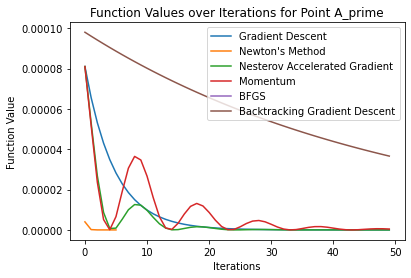

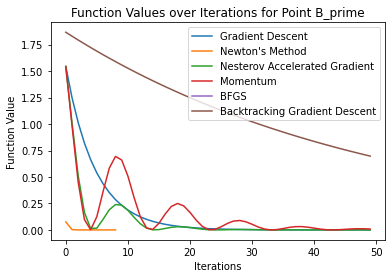

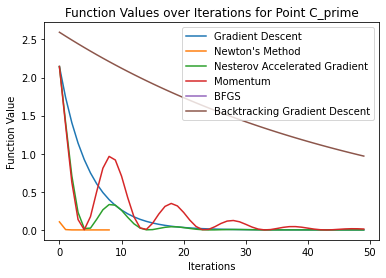

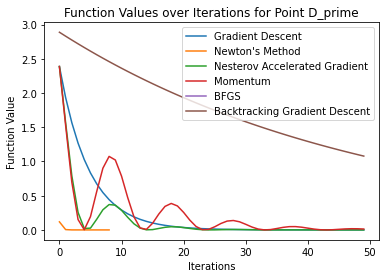

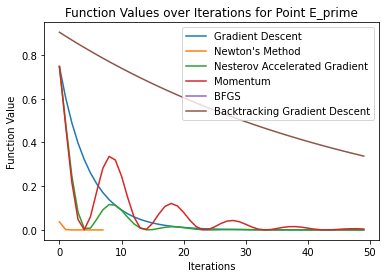

In [74]:
import matplotlib.pyplot as plt
import numpy as np

points = {
    'A_prime': [0.01, 0, 0],
    'B_prime': [0.05, 0.95, 1],
    'C_prime': [-0.65, 0.95, -1.15],
    'D_prime': [0.85, 1.15, 0.95],
    'E_prime': np.random.rand(3)
}

# Run optimization algorithms for each point and store function values
for point_name, point in points.items():
    # Initialize dictionary to store function values for each solver
    function_values = {solver_name: [] for solver_name in ['Gradient Descent', 'Newton\'s Method', 'Nesterov Accelerated Gradient', 'Momentum', 'BFGS', 'Backtracking Gradient Descent']}

    # Gradient Descent
    solver = GradientDescent(f, point, max_iter=50)
    solver.gradient_descent()
    function_values['Gradient Descent'].extend(solver.function_values[:51])  # Store function values for 50 iterates

    # Newton's Method
    solver = NewtonMethod(f, point, max_iter=50)
    solver.newton_method()
    function_values['Newton\'s Method'].extend(solver.function_values[:51])  # Store function values for 50 iterates

    # Nesterov Accelerated Gradient
    solver = NesterovAcceleratedGradient(f, point, learning_rate=0.1, momentum=0.9, max_iter=50)
    solver.nag()
    function_values['Nesterov Accelerated Gradient'].extend(solver.function_values[:51])  # Store function values for 50 iterates

    # Momentum
    solver = Momentum(f, point, learning_rate=0.1, momentum_factor=0.9, max_iter=50)
    solver.momentum()
    function_values['Momentum'].extend(solver.function_values[:51])  # Store function values for 50 iterates

    # BFGS
    solver = BFGS(f, point, max_iter=50)
    solver.bfgs()
    function_values['BFGS'].extend(solver.function_values[:51])  # Store function values for 50 iterates

    # Backtracking Gradient Descent
    solver = BacktrackingGradientDescent(f, point, max_iter=50)
    solver.backtracking_gradient_descent()
    function_values['Backtracking Gradient Descent'].extend(solver.function_values[:51])  # Store function values for 50 iterates

    # Plot the values of the function over the iterations for each solver
    for solver_name, values in function_values.items():
        plt.plot(range(len(values)), values, label=f"{solver_name}")

    plt.xlabel("Iterations")
    plt.ylabel("Function Value")
    plt.legend()
    plt.title(f"Function Values over Iterations for Point {point_name}")
    plt.show()


c (vekt 10%)
Do the same as part a, but for the stochastic setting, where the function now
depends on a stochastic variable as follows: f (x, y, z, ξ) = sin(π(xy + y2 −
z2)) + 0.5ξ(x4 + y4 − z2). Here ξ has normal distribution.

--> When a function depends on a stochastic variable, the function's output varies
randomly due to the randomness introduced by the stochastic variable.

In [80]:
# Define the new function f(x, y, z, xi) = sin(pi * (xy + y^2 - z^2)) + 0.5 * xi * (x^4 + y^4 - z^2)
xi_val = np.random.normal()
print(f"Value of xi: {xi_val}")
def f(x):
    x_val, y_val, z_val = x
    return np.sin(np.pi * (x_val * y_val + y_val**2 - z_val**2)) + 0.5 * xi_val * (x_val**4 + y_val**4 - z_val**2)

# Specify the five points: A', B', C', D', and E'
points = {
    'A_prime': [0.01, 0, 0],
    'B_prime': [0.05, 0.95, 1],
    'C_prime': [-0.65, 0.95, -1.15],
    'D_prime': [0.85, 1.15, 0.95],
    'E_prime': np.random.rand(3)
}

solvers = {
    'Gradient Descent (GD)': GradientDescent,
    'Newton´s Method': NewtonMethod,
    'Nesterov Accelerated Gradient (NAG)': NesterovAcceleratedGradient,
    'Momentum': Momentum,
    'BFGS': BFGS,
    'Backtracking Gradient Descent': BacktrackingGradientDescent
}

for point_name, point in points.items():
    print(f"Results for point {point_name}:")
    for solver_name, solver_class in solvers.items():
        print(f"\nResults for {solver_name}:")
        if solver_name == 'Backtracking Gradient Descent':
            solver = solver_class(f, point)
            solver.backtracking_gradient_descent()
        elif solver_name == 'Newton´s Method':
            solver = solver_class(f, point)
            solver.newton_method()
        elif solver_name == 'Nesterov Accelerated Gradient (NAG)':
            solver = solver_class(f, point, learning_rate=0.1, momentum=0.9)
            solver.nag()
        elif solver_name == 'Momentum':
            solver = solver_class(f, point, learning_rate=0.1, momentum_factor=0.9)
            solver.momentum()
        elif solver_name == 'BFGS':
            solver = solver_class(f, point)
            solver.bfgs()
        else:
            solver = solver_class(f, point)
            solver.gradient_descent()
        solver.print_results()
        print()  # Add an empty line between solver results

    print("-" * 50)  # Add a separation line between points



Value of xi: 0.5797430034933313
Results for point A_prime:

Results for Gradient Descent (GD):
Time used: 0.3040318489074707 seconds
Number of iterates: 100
End point: [2.65591057e-07 1.14657710e-11 0.00000000e+00]
Function value: 9.567210606554553e-18
Gradient at the end point: None
Hessian at the end point:
[[ 3.02920530e-13  3.14159265e+00  0.00000000e+00]
 [ 3.14159265e+00  6.28318531e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -6.86292831e+00]]
Eigenvalues of the Hessian at the end point: [-1.30129028  7.58447559 -6.86292831]
Gradient Descent found: Saddle point


Results for Newton´s Method:
Time used: 0.027811765670776367 seconds
Number of iterates: 7
End point: [1.27921253e-07 3.93736829e-11 0.00000000e+00]
Function value: 1.5828226949998197e-17
Gradient at the end point: [1.23696073e-10 4.02123860e-07 0.00000000e+00]
Hessian at the end point:
[[ 5.69209890e-14  3.14159265e+00  0.00000000e+00]
 [ 3.14159265e+00  6.28318531e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00

Time used: 1.0140087604522705 seconds
Number of iterates: 339
End point: [ 7.41537598e-08 -1.19868249e-07  2.49635978e-07]
Function value: -1.9662736553176877e-13
Gradient at the end point: [-3.76577212e-07 -5.20193517e-07 -1.71323382e-06]
Hessian at the end point:
[[ 8.22095880e-14  3.14159265e+00 -8.83845566e-17]
 [ 3.14159265e+00  6.28318531e+00  1.83171714e-17]
 [-8.83845566e-17  1.83171714e-17 -6.86292831e+00]]
Eigenvalues of the Hessian at the end point: [-1.30129028  7.58447559 -6.86292831]
Momentum found: Saddle point


Results for BFGS:
Time used: 0.037309885025024414 seconds
Number of iterates: 22
End point: [-0.59062181 -0.82411657  1.30204504]
Function value: -1.3181775312106037
Gradient at the end point: [ 1.06110959e-07  8.90510247e-09 -4.56358393e-08]
Hessian at the end point:
[[ 7.88793073 17.8426305  21.09054398]
 [17.8426305  51.04278712 57.29610411]
 [21.09054398 57.29610411 66.64309227]]
Eigenvalues of the Hessian at the end point: [123.27976588   1.58487524   0.709